# EJERCICIOS

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [3]:
# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.cifar10.load_data()

# primeras para entrenamiento 
x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

# 5000 para validación y 5000 para prueba
x_val = x_test_full[:5000]
y_val = y_test_full[:5000]

x_test = x_test_full[5000:10000]
y_test = y_test_full[5000:10000]

print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de y_val:", y_val.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape) 

Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_val: (5000, 32, 32, 3)
Forma de y_val: (5000, 1)
Forma de x_test: (5000, 32, 32, 3)
Forma de y_test: (5000, 1)


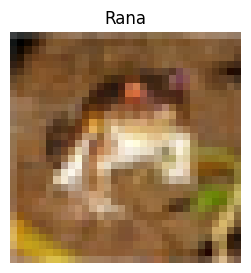

In [4]:
categorias = {
    0: "Avión", 1: "Automóvil", 2: "Pájaro", 
    3: "Gato", 4: "Ciervo", 5: "Perro", 
    6: "Rana", 7: "Caballo", 8: "Barco", 9: "Camión"
}

def display_image(image, label):
    plt.figure(figsize=(4, 3))
    plt.imshow(image)
    plt.title(categorias[label[0]])
    plt.axis('off')
    plt.show()

display_image(x_train[0], y_train[0])


### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32,32,3)))

# Flatten
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer=tf.keras.initializers.he_normal()))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [6]:
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

# Variables para guardar los mejores resultados
best_result = {
    'Red neuronal normal': {
        'Tasa de aprendizaje': None,
        'Entrenamiento sparse categorical accuracy': 0,
        'Validación sparse categorical accuracy': 0,
        'Tiempo total (s)': 0
    }
}
best_lr = None

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['sparse_categorical_accuracy'])

    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
    end_time = time.time()

    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time

    # Actualizar el mejor resultado si encontramos una mejor precisión de validación
    if val_acc > best_result['Red neuronal normal']['Validación sparse categorical accuracy']:
        best_result['Red neuronal normal'].update({
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        })
        best_lr = lr

print("Mejor resultado:")
print(best_result)
print(f"\nMejor tasa de aprendizaje encontrada: {best_lr}")

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 4.2890 - sparse_categorical_accuracy: 0.1585 - val_loss: 1.9856 - val_sparse_categorical_accuracy: 0.2738
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 1.9492 - sparse_categorical_accuracy: 0.2885 - val_loss: 1.8135 - val_sparse_categorical_accuracy: 0.3406
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.8289 - sparse_categorical_accuracy: 0.3340 - val_loss: 1.7442 - val_sparse_categorical_accuracy: 0.3642
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.7596 - sparse_categorical_accuracy: 0.3620 - val_loss: 1.7147 - val_sparse_categorical_accuracy: 0.3800
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.7139 - sparse_categorical_accuracy: 0.3838 - val_loss: 1.6674 - val_sparse_categorical_accuracy: 0.3876
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 1.5918 - sparse_categorical_accuracy: 0.4267 - val_loss: 1.5739 - val_sparse_categorical_acc

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [7]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model.fit(x_train, y_train, 
                   epochs=50,
                   validation_data=(x_val, y_val),
                   callbacks=[early_stopping_callback],
                   verbose=1)
end_time = time.time()

train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
val_acc = model.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50 
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

best_result['Red neuronal normal con detención temprana'] = {
    'Tasa de aprendizaje': best_lr,
    'Entrenamiento sparse categorical accuracy': train_acc,
    'Validación sparse categorical accuracy': val_acc,
    'Tiempo total (s)': total_time,
    'Mejor época': best_epoch
}

print("\nResultados finales:")
for model_type, metrics in best_result.items():
    print(f"\n{model_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - loss: 1.4983 - sparse_categorical_accuracy: 0.4603 - val_loss: 1.5324 - val_sparse_categorical_accuracy: 0.4502
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.4980 - sparse_categorical_accuracy: 0.4621 - val_loss: 1.5326 - val_sparse_categorical_accuracy: 0.4506
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 1.5048 - sparse_categorical_accuracy: 0.4567 - val_loss: 1.5326 - val_sparse_categorical_accuracy: 0.4508
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 1.5041 - sparse_categorical_accuracy: 0.4600 - val_loss: 1.5326 - val_sparse_categorical_accuracy: 0.4510
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 1.5102 - sparse_categorical_accuracy: 0.4576 - val_loss: 1.5327 - val_sparse_categorical_accuracy: 0.4514
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 1.5080 - sparse_categorical_accuracy: 0.4558 - val_loss: 1.5328 - val_sparse_categorical_ac

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

# Flatten
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer=tf.keras.initializers.he_normal()))
    model.add(tf.keras.layers.BatchNormalization())  
    model.add(tf.keras.layers.Activation('swish'))  


model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model.fit(x_train, y_train, 
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_callback],
                    verbose=1)
end_time = time.time()

train_acc = model.evaluate(x_train, y_train, verbose=0)[1]
val_acc = model.evaluate(x_val, y_val, verbose=0)[1]
total_time = end_time - start_time

if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50  
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

best_result['Red neuronal normal con detención temprana y BatchNormalization'] = {
    'Tasa de aprendizaje': best_lr,
    'Entrenamiento sparse categorical accuracy': train_acc,
    'Validación sparse categorical accuracy': val_acc,
    'Tiempo total (s)': total_time,
    'Mejor época': best_epoch
}

print("\nResultados finales:")
for model_type, metrics in best_result.items():
    print(f"\n{model_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 18ms/step - loss: 2.5422 - sparse_categorical_accuracy: 0.0985 - val_loss: 3.5385 - val_sparse_categorical_accuracy: 0.0920
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 2.5347 - sparse_categorical_accuracy: 0.1035 - val_loss: 3.5601 - val_sparse_categorical_accuracy: 0.0928
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - loss: 2.5337 - sparse_categorical_accuracy: 0.1016 - val_loss: 3.5309 - val_sparse_categorical_accuracy: 0.0950
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 2.5409 - sparse_categorical_accuracy: 0.0975 - val_loss: 3.5151 - val_sparse_categorical_accuracy: 0.0938
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - loss: 2.5342 - sparse_categorical_accuracy: 0.1003 - val_loss: 3.5873 - val_sparse_categorical_accuracy: 0.0930
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - loss: 2.5286 - sparse_categorical_accuracy: 0.1034 - val_loss: 3.4908 - val_sparse_categoric

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [19]:
def estandarizar(X_train, X_val, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_std = (X_train - mean) / std
    X_val_std = (X_val - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_val_std, X_test_std

x_train_std, x_val_std, x_test_std = estandarizar(x_train, x_val, x_test)

def create_model(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(20):
        model.add(tf.keras.layers.Dense(100, activation='swish', kernel_initializer=tf.keras.initializers.he_normal()))
        model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

model = create_model((32, 32, 3))
model.summary()

learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
best_result = {'Red neuronal normal': {
    'Tasa de aprendizaje': None,
    'Entrenamiento sparse categorical accuracy': 0,
    'Validación sparse categorical accuracy': 0,
    'Tiempo total (s)': 0
}}
best_lr = None

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['sparse_categorical_accuracy'])
    
    start_time = time.time()
    history = model.fit(x_train_std, y_train, epochs=5, validation_data=(x_val_std, y_val))
    end_time = time.time()
    
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time
    
    if val_acc > best_result['Red neuronal normal']['Validación sparse categorical accuracy']:
        best_result['Red neuronal normal'].update({
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        })
        best_lr = lr

optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model.fit(x_train_std, y_train, epochs=50, 
                    validation_data=(x_val_std, y_val),
                    callbacks=[early_stopping_callback], verbose=1)
end_time = time.time()

train_acc = model.evaluate(x_train_std, y_train, verbose=0)[1]
val_acc = model.evaluate(x_val_std, y_val, verbose=0)[1]
total_time = end_time - start_time

if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

best_result['Red neuronal normal con detención temprana y BatchNormalization'] = {
    'Tasa de aprendizaje': best_lr,
    'Entrenamiento sparse categorical accuracy': train_acc,
    'Validación sparse categorical accuracy': val_acc,
    'Tiempo total (s)': total_time,
    'Mejor época': best_epoch
}

print("\nResultados finales:")
for model_type, metrics in best_result.items():
    print(f"\n{model_type}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 2.7503 - sparse_categorical_accuracy: 0.0997 - val_loss: 3.0262 - val_sparse_categorical_accuracy: 0.1160
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 2.4010 - sparse_categorical_accuracy: 0.1205 - val_loss: 2.5264 - val_sparse_categorical_accuracy: 0.1522
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 2.2290 - sparse_categorical_accuracy: 0.1740 - val_loss: 2.1120 - val_sparse_categorical_accuracy: 0.2258
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 2.0678 - sparse_categorical_accuracy: 0.2329 - val_loss: 1.9543 - val_sparse_categorical_accuracy: 0.2856
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 1.9545 - sparse_categorical_accuracy: 0.2809 - val_loss: 1.8532 - val_sparse_categorical_accuracy: 0.3304
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 1.8824 - sparse_categorical_accuracy: 0.3151 - val_loss: 1.8185 - val_sparse_categorical_acc

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [ ]:
def estandarizar(X_train, X_val, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_std = (X_train - mean) / std
    X_val_std = (X_val - mean) / std
    X_test_std = (X_test - mean) / std
    return X_train_std, X_val_std, X_test_std

x_train_std, x_val_std, x_test_std = estandarizar(x_train, x_val, x_test)

def create_selu_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(20):
        model.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(0.5))  # Se agrega Dropout
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

model_selu = create_selu_model((32, 32, 3))

# Tasa de aprendizaje
learning_rates = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
results_selu = []

for lr in learning_rates:
    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    model_selu.compile(optimizer=optimizer,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       metrics=['sparse_categorical_accuracy'])
    
    start_time = time.time()
    history = model_selu.fit(x_train_std, y_train, epochs=5, validation_data=(x_val_std, y_val))
    end_time = time.time()
    
    train_acc = history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    total_time = end_time - start_time
    
    results_selu.append({
        'Red neuronal SELU': {
            'Tasa de aprendizaje': lr,
            'Entrenamiento sparse categorical accuracy': train_acc,
            'Validación sparse categorical accuracy': val_acc,
            'Tiempo total (s)': total_time
        }
    })

# Entrenamiento con early stopping
best_lr = 1e-8
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_lr)
model_selu.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=['sparse_categorical_accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_sparse_categorical_accuracy',
    patience=5,
    restore_best_weights=True
)

start_time = time.time()
history = model_selu.fit(x_train_std, y_train, epochs=50, 
                          validation_data=(x_val_std, y_val),
                          callbacks=[early_stopping_callback], 
                          verbose=1)
end_time = time.time()

train_accuracy = model_selu.evaluate(x_train_std, y_train, verbose=0)[1]
val_accuracy = model_selu.evaluate(x_val_std, y_val, verbose=0)[1]
total_time = end_time - start_time

if early_stopping_callback.stopped_epoch == 0:
    best_epoch = 50
else:
    best_epoch = early_stopping_callback.stopped_epoch - early_stopping_callback.patience + 1

results_selu.append({
    'Red neuronal SELU con early stopping': {
        'Tasa de aprendizaje': best_lr,
        'Entrenamiento sparse categorical accuracy': train_accuracy,
        'Validación sparse categorical accuracy': val_accuracy,
        'Tiempo total (s)': total_time,
        'Mejor época': best_epoch
    }
})

for result in results_selu:
    print(result)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - loss: 3.3399 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.3215 - val_sparse_categorical_accuracy: 0.1034
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 2.7942 - sparse_categorical_accuracy: 0.0988 - val_loss: 2.3097 - val_sparse_categorical_accuracy: 0.0904
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 2.5960 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3040 - val_sparse_categorical_accuracy: 0.1040
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 2.4747 - sparse_categorical_accuracy: 0.1033 - val_loss: 2.3033 - val_sparse_categorical_accuracy: 0.1030
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 2.4251 - sparse_categorical_accuracy: 0.0981 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.1038
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - loss: 2.3867 - sparse_categorical_accuracy: 0.1003 - val_loss: 2.3036 - val_sparse_categorical_acc